<a href="https://colab.research.google.com/github/arybinski/xai-notebooks/blob/master/LIME_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Load LIME
%load_ext autoreload
%autoreload 2
!pip install -q lime
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

     |████████████████████████████████| 276kB 2.8MB/s 


In [2]:
#@title Load models
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)
inet_model = inc_net.InceptionV3()

Using TensorFlow backend.


Notebook run using keras: 2.2.5








96116736/96112376 [==============================] - 1s 0us/step


In [0]:
#@title Transorm image
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  320k  100  320k    0     0  4647k      0 --:--:-- --:--:-- --:--:-- 4647k
40960/35363 [==================================] - 0s 0us/step
('n04251144', 'snorkel', 0.83774686)
('n10565667', 'scuba_diver', 0.124420725)
('n09256479', 'coral_reef', 0.003938193)
('n01751748', 'sea_snake', 0.00332862)
('n01498041', 'stingray', 0.0014240011)


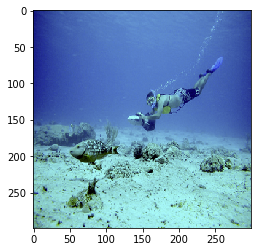

In [5]:
#@title Load and classify image
!curl --remote-name \
     --location https://storage.googleapis.com/lucid-static/activation-atlas/adversarial-examples/examples/snorkel.png
img_path = 'snorkel.png'

images = transform_img_fn([img_path])
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
#@title LIME explanation
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [0]:
#@title Explanation mask 1
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

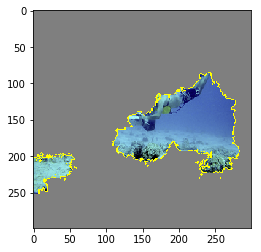

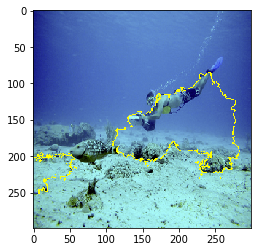

In [0]:
#@title Explanation mask 2
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

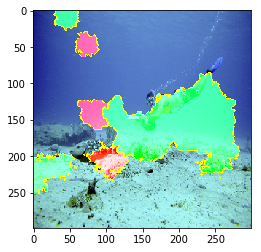

In [0]:
#@title Explanation mask 3
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

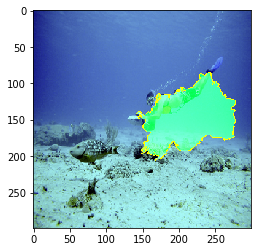

In [0]:
#@title Explanation mask 4
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

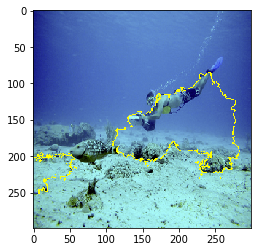

In [0]:
#@title Explanation mask 5
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

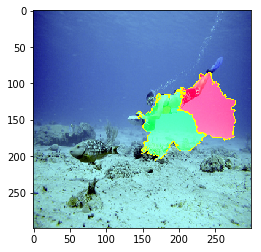

In [0]:
#@title Explanation mask 6
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))